# Destinations des bateaux chargés de sel partis de la région

Point de départ : commentaire de Silvia ->

> je me suis avancée au pif, on peut vérifier aussi en juin, mais ça serait sympa de vérifier les destinations des navires chargés de sel en 1789 partis de notre région.

Méthodologie :

* prendre les pointcalls In 1789 avec source_subset = 'Poitou_1789' (cela nous donne les destinations de tous les navires partis de la région)
* scanner 'commodity_standardized_fr', 'commodity_standardized2_fr', 'commodity_standardized3_fr', 'commodity_standardized4_fr' pour ne garder que les pointcalls dont au moins une valeur est "Sel"
* agréger par nombre de pointcalls et tonnage cumulés

In [1]:
from poitousprint import Portic

client = Portic()

In [2]:
pointcalls_out = client.get_pointcalls(
    year = 1789, 
    source_subset = 'Poitou_1789',
    pointcall_action = 'In'
)

In [3]:
pointcalls_out[0]

{'pkid': 95234,
 'record_id': '00351789',
 'pointcall': 'Chalon',
 'pointcall_uhgs_id': 'A1969195',
 'toponyme_fr': 'Châlon',
 'toponyme_en': 'Châlon',
 'latitude': '45.724946',
 'longitude': '-0.963790',
 'pointcall_admiralty': 'Marennes',
 'pointcall_province': 'Saintonge',
 'pointcall_states': '[{"1749-1815" : "France"}]',
 'pointcall_substates': None,
 'pointcall_states_en': '[{"1749-1815" : "France"}]',
 'pointcall_substates_en': None,
 'state_1789_fr': 'France',
 'state_1789_en': 'France',
 'substate_1789_fr': None,
 'substate_1789_en': None,
 'nb_conges_1787_inputdone': None,
 'nb_conges_1787_cr': None,
 'nb_conges_1789_inputdone': None,
 'nb_conges_1789_cr': None,
 'pointcall_status_uncertainity': None,
 'pointcall_status': None,
 'shiparea': 'ACE-ROCH',
 'pointcall_point': '0101000020110F000086B2E1CA8931FAC0A1CEC129EFE15541',
 'ferme_direction': None,
 'ferme_bureau': None,
 'ferme_bureau_uncertainty': None,
 'partner_balance_1789': None,
 'partner_balance_supp_1789': 'France'

In [16]:
commodity_fields = ['commodity_standardized_fr', 'commodity_standardized2_fr', 'commodity_standardized3_fr', 'commodity_standardized4_fr']

destinations = {}

for pc in pointcalls_out:
    for field in commodity_fields:
        if pc[field] is not None and pc[field].lower() == 'sel':
            port = pc["toponyme_fr"]
            tonnage = int(pc["tonnage"] if pc["tonnage"] is not None else 0)
            if port in destinations:
                destinations[port]["count"] += 1
                destinations[port]["tonnages_cumulated"] += tonnage
            else :
                destinations[port] = {
                    "count": 1,
                    "tonnages_cumulated": tonnage,
                    "state": pc["state_1789_fr"],
                    "in_region": True if pc["pointcall_admiralty"] in ["Marennes", "La Rochelle", "Sables d'Olonne"] else False
                }

destinations = [{"port": port, **data} for port, data in destinations.items()]

In [8]:
from vega import VegaLite
import pandas as pd

In [17]:
destinations[0]

{'port': 'La Rochelle',
 'count': 50,
 'tonnages_cumulated': 846,
 'state': 'France',
 'in_region': True}

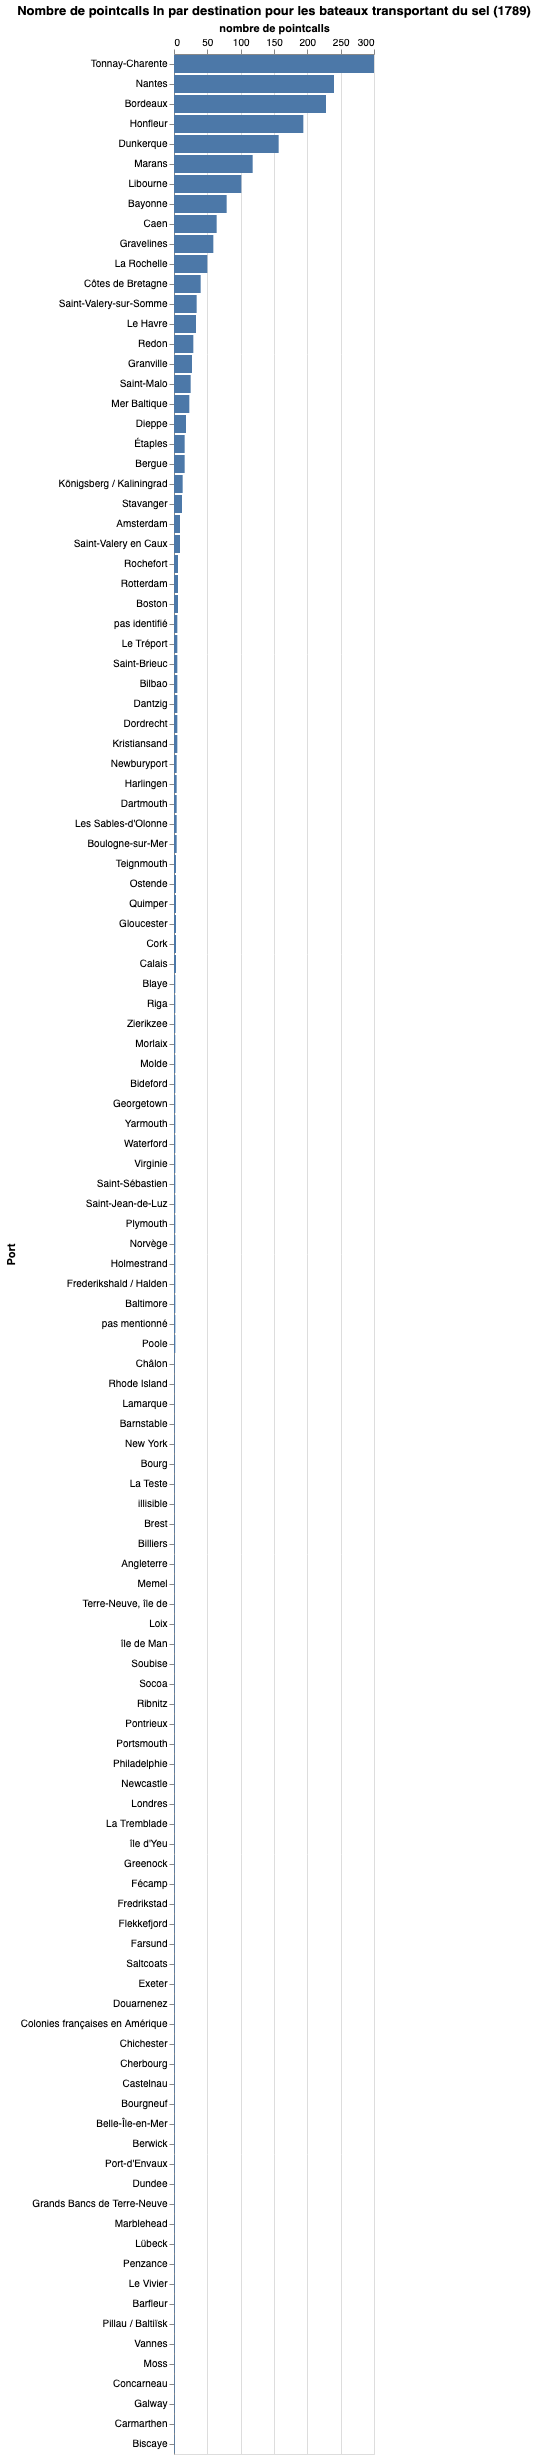

In [19]:
VegaLite({
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "title": "Nombre de pointcalls In par destination pour les bateaux transportant du sel (1789)",
    "mark": {"type": "bar", "tooltip": {"content": "data"}},
    "encoding": {
        "x": {
            "field": "count",
            "type": "quantitative", 
            "title": "nombre de pointcalls",
            "axis": {
                "orient": "top"
            }
        },
        "y": {
            "type": "nominal",
            "field": "port",
            "title": "Port",
            "sort": "-x"
        }
    }
}, pd.DataFrame([pc for pc in destinations]))

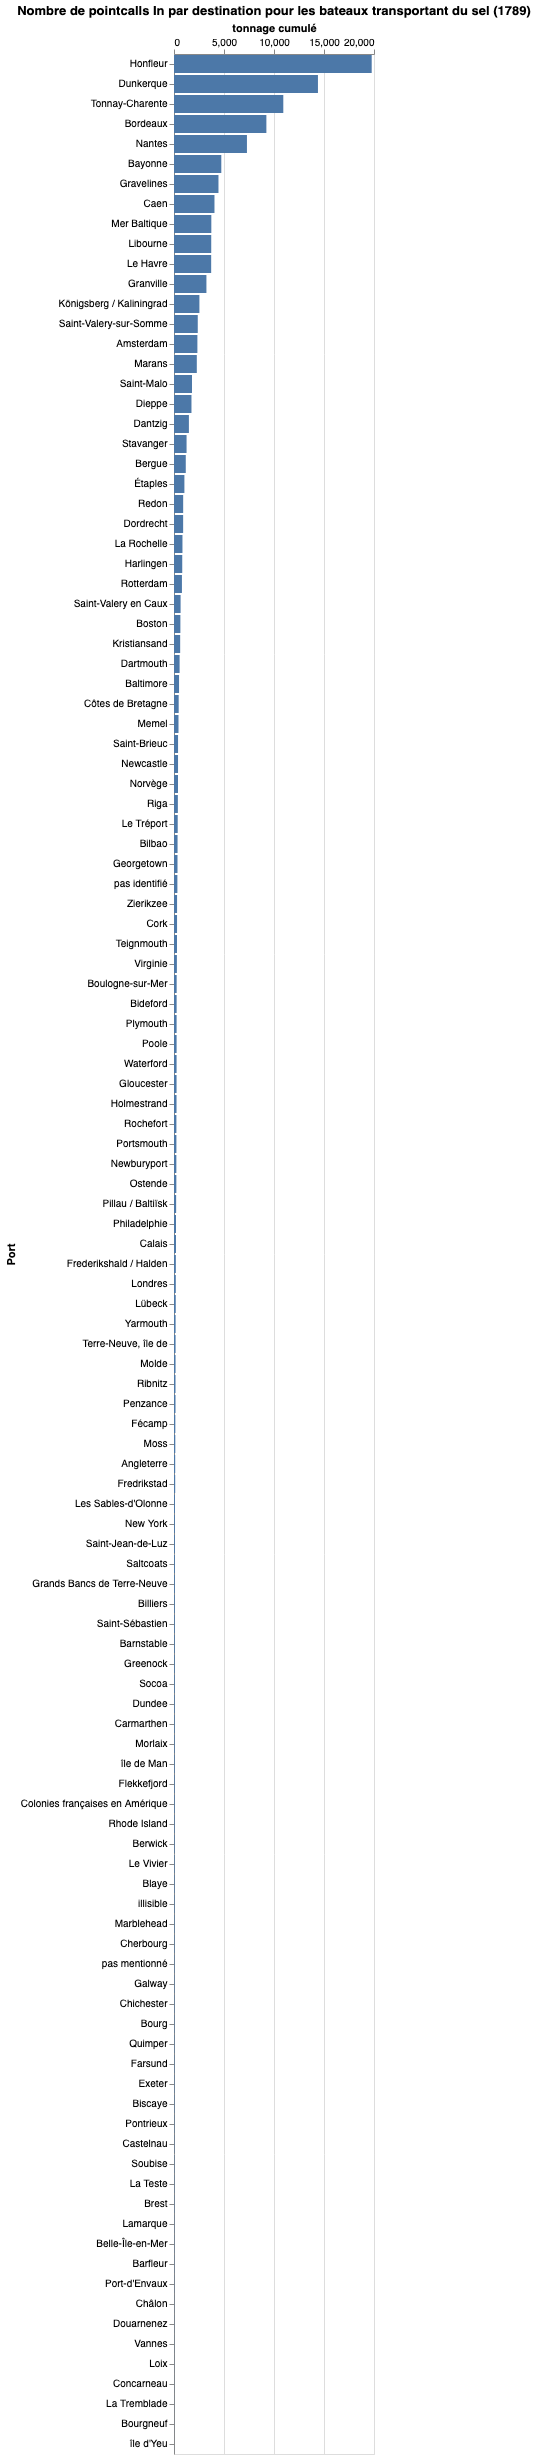

In [20]:
VegaLite({
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "title": "Nombre de pointcalls In par destination pour les bateaux transportant du sel (1789)",
    "mark": {"type": "bar", "tooltip": {"content": "data"}},
    "encoding": {
        "x": {
            "field": "tonnages_cumulated",
            "type": "quantitative", 
            "title": "tonnage cumulé",
            "axis": {
                "orient": "top"
            }
        },
        "y": {
            "type": "nominal",
            "field": "port",
            "title": "Port",
            "sort": "-x"
        }
    }
}, pd.DataFrame([pc for pc in destinations]))

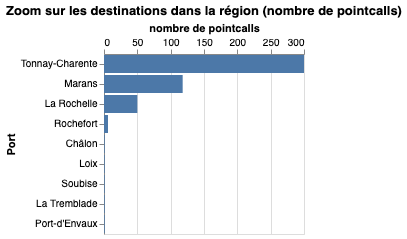

In [21]:
VegaLite({
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "title": "Zoom sur les destinations dans la région (nombre de pointcalls)",
    "mark": {"type": "bar", "tooltip": {"content": "data"}},
    "encoding": {
        "x": {
            "field": "count",
            "type": "quantitative", 
            "title": "nombre de pointcalls",
            "axis": {
                "orient": "top"
            }
        },
        "y": {
            "type": "nominal",
            "field": "port",
            "title": "Port",
            "sort": "-x"
        }
    }
}, pd.DataFrame([pc for pc in destinations if pc["in_region"] == True]))

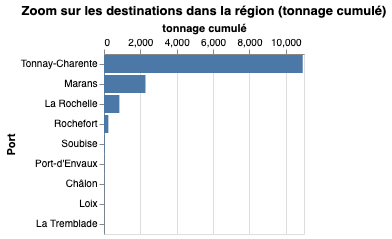

In [23]:
VegaLite({
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "title": "Zoom sur les destinations dans la région (tonnage cumulé)",
    "mark": {"type": "bar", "tooltip": {"content": "data"}},
    "encoding": {
        "x": {
            "field": "tonnages_cumulated",
            "type": "quantitative", 
            "title": "tonnage cumulé",
            "axis": {
                "orient": "top"
            }
        },
        "y": {
            "type": "nominal",
            "field": "port",
            "title": "Port",
            "sort": "-x"
        }
    }
}, pd.DataFrame([pc for pc in destinations if pc["in_region"] == True]))

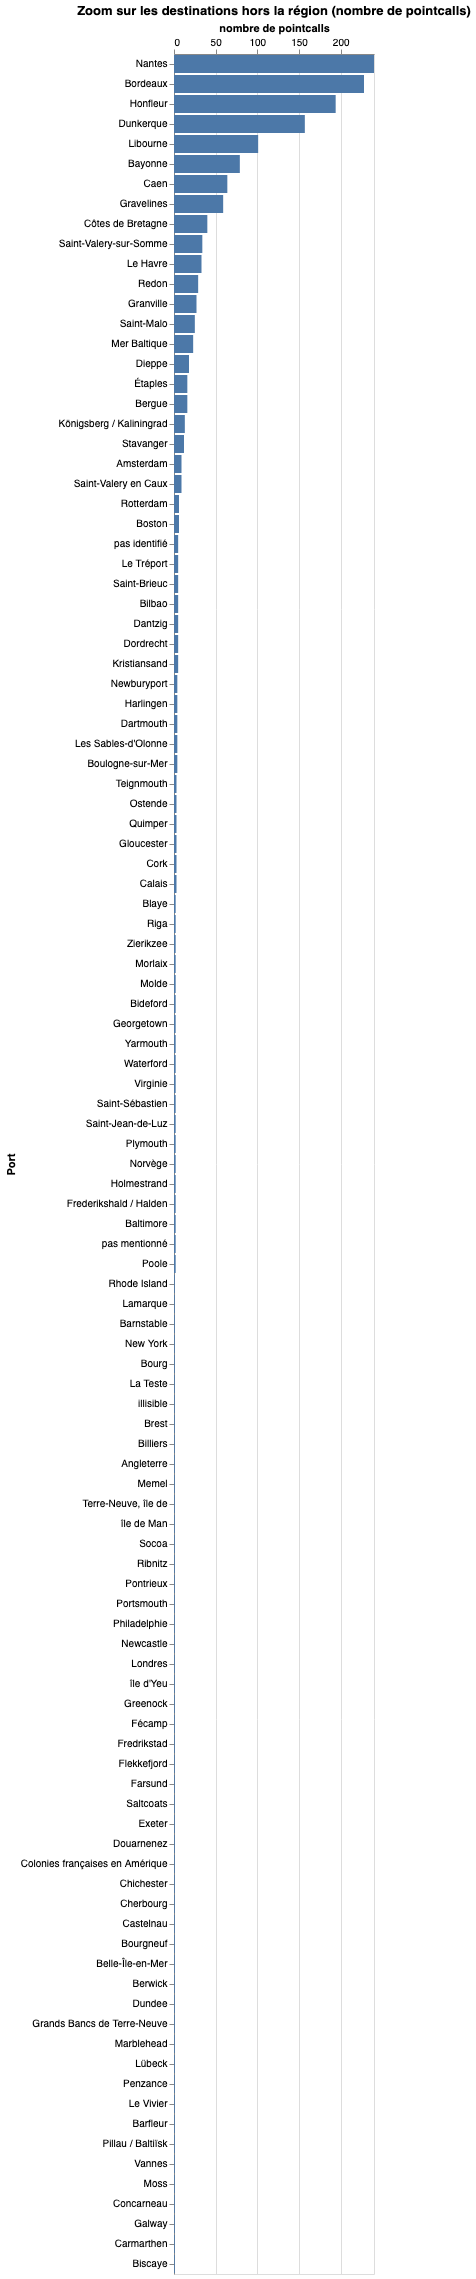

In [24]:
VegaLite({
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "title": "Zoom sur les destinations hors la région (nombre de pointcalls)",
    "mark": {"type": "bar", "tooltip": {"content": "data"}},
    "encoding": {
        "x": {
            "field": "count",
            "type": "quantitative", 
            "title": "nombre de pointcalls",
            "axis": {
                "orient": "top"
            }
        },
        "y": {
            "type": "nominal",
            "field": "port",
            "title": "Port",
            "sort": "-x"
        }
    }
}, pd.DataFrame([pc for pc in destinations if pc["in_region"] == False]))

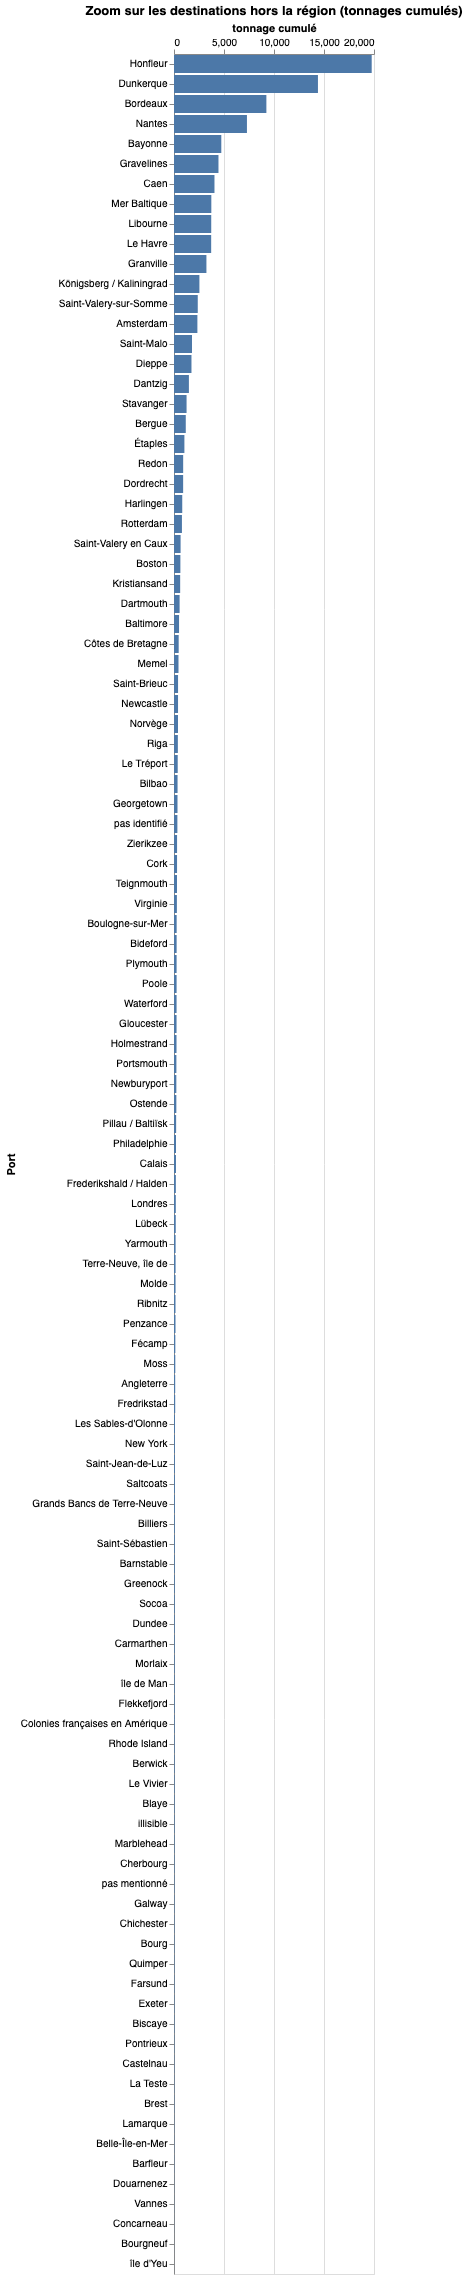

In [34]:
VegaLite({
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "title": "Zoom sur les destinations hors la région (tonnages cumulés)",
    "mark": {"type": "bar", "tooltip": {"content": "data"}},
    "encoding": {
        "x": {
            "field": "tonnages_cumulated",
            "type": "quantitative", 
            "title": "tonnage cumulé",
            "axis": {
                "orient": "top"
            }
        },
        "y": {
            "type": "nominal",
            "field": "port",
            "title": "Port",
            "sort": "-x"
        }
    }
}, pd.DataFrame([pc for pc in destinations if pc["in_region"] == False]))

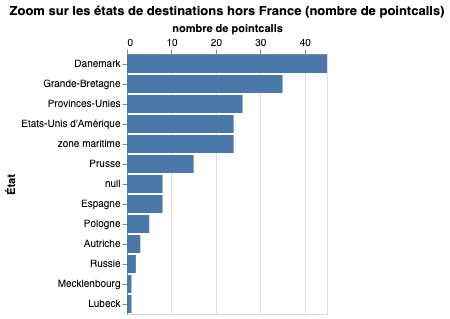

In [36]:
VegaLite({
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "title": "Zoom sur les états de destinations hors France (nombre de pointcalls)",
    "mark": {"type": "bar", "tooltip": {"content": "data"}},
    "encoding": {
        "x": {
            "field": "count",
            "type": "quantitative", 
            "aggregate": "sum",
            "title": "nombre de pointcalls",
            "axis": {
                "orient": "top"
            }
        },
        "y": {
            "type": "nominal",
            "field": "state",
            "title": "État",
            "sort": "-x"
        }
    }
}, pd.DataFrame([pc for pc in destinations if pc["in_region"] == False and pc["state"] != 'France']))

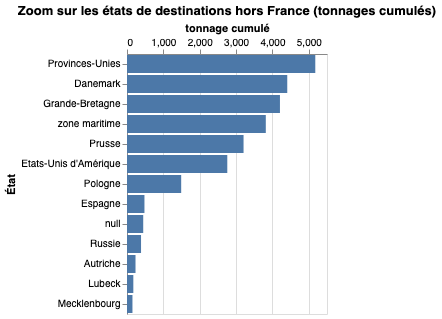

In [37]:
VegaLite({
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "title": "Zoom sur les états de destinations hors France (tonnages cumulés)",
    "mark": {"type": "bar", "tooltip": {"content": "data"}},
    "encoding": {
        "x": {
            "field": "tonnages_cumulated",
            "type": "quantitative", 
            "aggregate": "sum",
            "title": "tonnage cumulé",
            "axis": {
                "orient": "top"
            }
        },
        "y": {
            "type": "nominal",
            "field": "state",
            "title": "État",
            "sort": "-x"
        }
    }
}, pd.DataFrame([pc for pc in destinations if pc["in_region"] == False and pc["state"] != 'France']))